In [2]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"
scenarios = glob.glob(f"{data_dir}*")
scenarios = [scenario[scenario.rfind('/')+1:] for scenario in scenarios]
scenarios

['Aghulas_20200121']

In [4]:
scenario = 'Aghulas_20200121'
files = glob.glob(f"{data_dir+scenario}/*.nc")
files

['/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173530-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173259-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173506-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173413-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173234-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173441-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173324-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200121/20200121T173348-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1

In [5]:
slice_max = 350

ts = []
for i, file in enumerate(files):
    data = xr.open_dataset(file)
    t = xr.concat([data.isel(swath = i).drop_dims('time') for i in range(data.dims['swath'])], dim = 'cell').doppler_centroid_anomaly#.plot()
    t = t.dropna(dim="cell")
    t = t.isel(cell = slice(0,slice_max))
    t.attrs.update(data.attrs)
    ts.append(t)
    # plt.figure()
    # t.plot(robust = True)ß

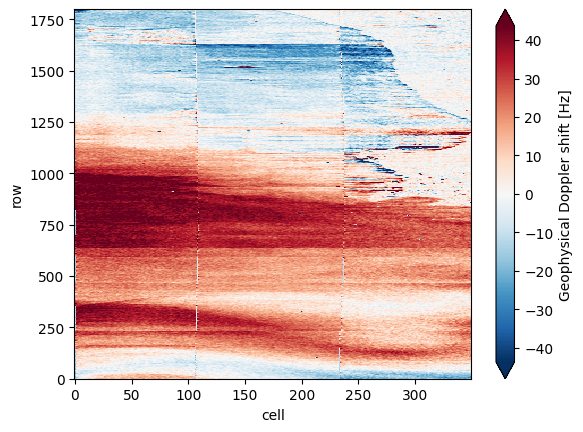

In [6]:
s = [t.attrs['time_coverage_start'] for t in ts]
position  = sorted(range(len(s)), key=lambda k: s[k])

tss =[ts[i] for i in position]

dca = xr.concat(tss, dim ='row', join='outer')
dca.plot(robust = True)

## - Load Sentinel-1 file

In [53]:
dir_s1_file = '/Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200121/'
path_s1_file = glob.glob(f"{dir_s1_file}/*.nc")[0]
S1 = xr.open_dataset(path_s1_file)

In [56]:
S1 = S1.assign_coords({"lat": S1.latitude, "lon": S1.longitude})
S1.swap_dims({'azimuth_time':'lat', 'ground_range': 'lon'})
# S1 = S1.rename({'azimuth_time':'row', 'ground_range':'cell'})
S1

ValueError: replacement dimension 'lat' is not a 1D variable along the old dimension 'azimuth_time'

array([[-38.90009843, -38.89984765, -38.89959688, ..., -38.21779375,
        -38.21779375, -38.21779375],
       [-38.8992197 , -38.89896895, -38.89871821, ..., -38.21692221,
        -38.21692221, -38.21692221],
       [-38.89834096, -38.89809025, -38.89783955, ..., -38.21605067,
        -38.21605067, -38.21605067],
       ...,
       [-34.44752612, -34.44728721, -34.44704831, ...,          nan,
                 nan,          nan],
       [-34.44752612, -34.44728721, -34.44704831, ...,          nan,
                 nan,          nan],
       [-34.44752612, -34.44728721, -34.44704831, ...,          nan,
                 nan,          nan]])

In [64]:
dca

<xarray.DataArray 'doppler_centroid_anomaly' (row: 1801, cell: 350)>
array([[-22.63471  , -13.482061 ,  -4.7407846, ..., -16.390991 ,
        -17.098143 , -16.00055  ],
       [-13.450899 , -12.527545 ,  -2.6002998, ..., -18.803356 ,
        -17.638084 , -17.589907 ],
       [-27.916527 , -14.554821 ,  -4.027096 , ..., -17.6502   ,
        -17.377346 , -18.780626 ],
       ...,
       [-41.4161   , -38.476692 , -38.95003  , ...,   1.2377357,
         -1.0585761,  -6.2364426],
       [-37.708138 , -36.131145 , -35.042435 , ...,   1.7840748,
         -3.0840664,  -0.9714699],
       [-27.521606 , -32.86736  , -29.84945  , ...,   3.932581 ,
         -1.1568909,  -1.3003025]], dtype=float32)
Coordinates:
    lat      (row, cell) float32 -40.61 -40.61 -40.61 ... -27.75 -27.75 -27.74
    lon      (row, cell) float32 18.51 18.52 18.53 18.54 ... 16.91 16.91 16.92
Dimensions without coordinates: row, cell
Attributes: (12/61)
    units:                         Hz
    long_name:                     Geophysical Doppler shift
    comment:                       These data were produced at NERSC and ODL ...
    Conventions:                   CF-1.7, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Climate and Forecast (CF) 1.7, Attribute C...
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    key_variables:                 doppler_centroid_anomaly
    date_created:                  2022-03-23T09:40:22.259240
    date_modified:                 2022-03-23T09:40:22.259246
    source:                        S1-OSC-RVL
    source_version:                1.0
    input:                         S1A_IW_SL2__1_DV_20200121T173234_20200121T...

In [65]:


dca.groupby_bins("lat", S1.latitude.values)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [46]:
common_grid = xr.DataArray({'lon': (['row', 'cell'], S1['lon'].values), 'lat': (['row', 'cell'], S1['lat'].values)})

# Interpolate both datasets to the common grid
ds1_interp = dca.interp_like(common_grid, method='linear')
ds2_interp = S1.NRCS_VV.interp_like(common_grid, method='linear')

In [48]:
ds1_interp, ds2_interp

(<xarray.DataArray 'doppler_centroid_anomaly' (row: 1801, cell: 350)>
 array([[-22.63471  , -13.482061 ,  -4.7407846, ..., -16.390991 ,
         -17.098143 , -16.00055  ],
        [-13.450899 , -12.527545 ,  -2.6002998, ..., -18.803356 ,
         -17.638084 , -17.589907 ],
        [-27.916527 , -14.554821 ,  -4.027096 , ..., -17.6502   ,
         -17.377346 , -18.780626 ],
        ...,
        [-41.4161   , -38.476692 , -38.95003  , ...,   1.2377357,
          -1.0585761,  -6.2364426],
        [-37.708138 , -36.131145 , -35.042435 , ...,   1.7840748,
          -3.0840664,  -0.9714699],
        [-27.521606 , -32.86736  , -29.84945  , ...,   3.932581 ,
          -1.1568909,  -1.3003025]], dtype=float32)
 Coordinates:
     lat      (row, cell) float32 -40.61 -40.61 -40.61 ... -27.75 -27.75 -27.74
     lon      (row, cell) float32 18.51 18.52 18.53 18.54 ... 16.91 16.91 16.92
 Dimensions without coordinates: row, cell
 Attributes: (12/61)
     units:                         Hz
     long_na

In [30]:
ds2_interp#, ds2_interp

<xarray.DataArray 'NRCS_VV' (azimuth_time: 5061, ground_range: 2596)>
array([[-0.004791, -0.004771, -0.004751, ..., -0.003303, -0.003324, -0.003347],
       [-0.004791, -0.004771, -0.004751, ..., -0.003303, -0.003324, -0.003347],
       [-0.004791, -0.004771, -0.004751, ..., -0.003303, -0.003324, -0.003347],
       ...,
       [-0.00457 , -0.004553, -0.004536, ...,       nan,       nan,       nan],
       [-0.00457 , -0.004553, -0.004536, ...,       nan,       nan,       nan],
       [-0.00457 , -0.004553, -0.004536, ...,       nan,       nan,       nan]])
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 2020-01-21T17:33:02.294277787...
  * ground_range  (ground_range) float64 45.0 145.0 ... 2.594e+05 2.595e+05
    pixel         (ground_range) float64 4.5 14.5 24.5 ... 2.594e+04 2.595e+04
    line          (azimuth_time) float64 4.5 14.5 24.5 ... 1.685e+04 1.686e+04
    lat           (azimuth_time, ground_range) float64 -38.9 -38.9 ... nan nan
    lon           (azimuth_time, ground_range) float64 17.84 17.84 ... nan nan
Attributes: (12/32)
    AREA_OR_POINT:                       Area
    TIFFTAG_DATETIME:                    2020:01:21 18:49:59
    TIFFTAG_IMAGEDESCRIPTION:            Sentinel-1A IW GRD HR L1
    TIFFTAG_SOFTWARE:                    Sentinel-1 IPF 003.10
    family_name:                         SENTINEL-1
    number:                              A
    ...                                  ...
    geospatial_lat_min:                  -38.90062197669803
    geospatial_lat_max:                  -36.74484281213144
    geospatial_lon_min:                  17.31302998701667
    geospatial_lon_max:                  20.68662558466438
    units:                               m2 m-2
    long_name:                           sigma nought

In [31]:
ds1_interp

<xarray.DataArray 'doppler_centroid_anomaly' (row: 1801, cell: 350)>
array([[-22.63471  , -13.482061 ,  -4.7407846, ..., -16.390991 ,
        -17.098143 , -16.00055  ],
       [-13.450899 , -12.527545 ,  -2.6002998, ..., -18.803356 ,
        -17.638084 , -17.589907 ],
       [-27.916527 , -14.554821 ,  -4.027096 , ..., -17.6502   ,
        -17.377346 , -18.780626 ],
       ...,
       [-41.4161   , -38.476692 , -38.95003  , ...,   1.2377357,
         -1.0585761,  -6.2364426],
       [-37.708138 , -36.131145 , -35.042435 , ...,   1.7840748,
         -3.0840664,  -0.9714699],
       [-27.521606 , -32.86736  , -29.84945  , ...,   3.932581 ,
         -1.1568909,  -1.3003025]], dtype=float32)
Coordinates:
    lat      (row, cell) float32 -40.61 -40.61 -40.61 ... -27.75 -27.75 -27.74
    lon      (row, cell) float32 18.51 18.52 18.53 18.54 ... 16.91 16.91 16.92
Dimensions without coordinates: row, cell
Attributes: (12/61)
    units:                         Hz
    long_name:                     Geophysical Doppler shift
    comment:                       These data were produced at NERSC and ODL ...
    Conventions:                   CF-1.7, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Climate and Forecast (CF) 1.7, Attribute C...
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    key_variables:                 doppler_centroid_anomaly
    date_created:                  2022-03-23T09:40:22.259240
    date_modified:                 2022-03-23T09:40:22.259246
    source:                        S1-OSC-RVL
    source_version:                1.0
    input:                         S1A_IW_SL2__1_DV_20200121T173234_20200121T...

In [14]:
merged_ds = xr.merge([dca, S1.NRCS_VV], join='inner')

: 

In [11]:
S1.NRCS_VV

<xarray.DataArray 'NRCS_VV' (azimuth_time: 5061, ground_range: 2596)>
[13138356 values with dtype=float64]
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 2020-01-21T17:33:02.294277787...
  * ground_range  (ground_range) float64 45.0 145.0 ... 2.594e+05 2.595e+05
    pixel         (ground_range) float64 ...
    line          (azimuth_time) float64 ...
Attributes: (12/32)
    AREA_OR_POINT:                       Area
    TIFFTAG_DATETIME:                    2020:01:21 18:49:59
    TIFFTAG_IMAGEDESCRIPTION:            Sentinel-1A IW GRD HR L1
    TIFFTAG_SOFTWARE:                    Sentinel-1 IPF 003.10
    family_name:                         SENTINEL-1
    number:                              A
    ...                                  ...
    geospatial_lat_min:                  -38.90062197669803
    geospatial_lat_max:                  -36.74484281213144
    geospatial_lon_min:                  17.31302998701667
    geospatial_lon_max:                  20.68662558466438
    units:                               m2 m-2
    long_name:                           sigma nought

In [66]:
ds = xr.tutorial.open_dataset("air_temperature").isel(time=0)
ds

ImportError: tutorial.open_dataset depends on pooch to download and manage datasets. To proceed please install pooch.

In [67]:
x = np.linspace(240, 300, 100)

z = np.linspace(20, 70, 100)

# relation between new and original coordinates
lat = xr.DataArray(z, dims=["z"], coords={"z": z})

lon = xr.DataArray(
    (x[:, np.newaxis] - 270) / np.cos(z * np.pi / 180) + 270,
    dims=["x", "z"],
    coords={"x": x, "z": z},
)
lon

<xarray.DataArray (x: 100, z: 100)>
array([[238.07466683, 237.97066337, 237.8634749 , ..., 186.32558427,
        184.3566626 , 182.285868  ],
       [238.71962305, 238.61772067, 238.51269762, ..., 188.0159765 ,
        186.08683104, 184.05787066],
       [239.36457928, 239.26477798, 239.16192035, ..., 189.70636874,
        187.81699947, 185.82987333],
       ...,
       [300.63542072, 300.73522202, 300.83807965, ..., 350.29363126,
        352.18300053, 354.17012667],
       [301.28037695, 301.38227933, 301.48730238, ..., 351.9840235 ,
        353.91316896, 355.94212934],
       [301.92533317, 302.02933663, 302.1365251 , ..., 353.67441573,
        355.6433374 , 357.714132  ]])
Coordinates:
  * x        (x) float64 240.0 240.6 241.2 241.8 ... 298.2 298.8 299.4 300.0
  * z        (z) float64 20.0 20.51 21.01 21.52 22.02 ... 68.48 68.99 69.49 70.0

In [73]:
 dca.flatten()

AttributeError: 'DataArray' object has no attribute 'flatten'

In [ ]:
import pandas as pd
pd.MultiIndex

In [69]:
dca.interp(cell = dca.lon)

KeyError: 'row'